In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Apartado 6

In [46]:
try:
    df_airbnb = open('madrid-airbnb-listings-small.csv', encoding='utf-8')
except FileNotFoundError:
    print('El fichero no existe.')
else:
    lineas = df_airbnb.readlines()
    df_airbnb.close()
    columnas = lineas[0].split('\t')
    seleccion = ['id', 'host_id', 'neighbourhood_group_cleansed', 'accommodates', 'price', 'room_type']
    traduccion = {'id':'id', 'host_id':'anfitrion', 'neighbourhood_group_cleansed':'distrito', 'accommodates':'plazas', 'price':'precio', 'room_type':'tipos de alojamiento'}
    alojamientos = []
    for linea in lineas[1:]:
        alojamiento = {}
        campos = linea.split('\t')
        for i in range(len(columnas)):
            if columnas[i] in seleccion:
                alojamiento[traduccion[columnas[i]]] = campos[i]
        alojamientos.append(alojamiento)

    df_alojamientos = pd.DataFrame(alojamientos)
df_alojamientos

,id,anfitrion,distrito,tipos de alojamiento,plazas,precio
0,6369,13660,Chamartín,Private room,2,$70.00
1,21853,83531,Latina,Private room,1,$17.00
2,24805,101471,Centro,Entire home/apt,3,$80.00
3,24836,101653,Centro,Entire home/apt,4,$115.00
4,26825,114340,Arganzuela,Private room,1,$25.00
...,...,...,...,...,...,...
995,2686592,13751801,Centro,Private room,1,$21.00
996,2701211,1650712,Salamanca,Entire home/apt,4,$165.00
997,2704499,13841663,Centro,Entire home/apt,3,$85.00
998,2706194,1843216,Centro,Entire home/apt,4,$69.00


### Apartado 7

In [47]:
def tipos_de_alojamiento_por_distrito(df_alojamientos, lista_distritos):
    resultado = pd.DataFrame(columns=['distrito', 'tipo de alojamiento', 'porcentaje'])
    for distrito in lista_distritos:
        df_distrito = df_alojamientos[df_alojamientos['distrito'] == distrito]
        total_alojamientos = len(df_distrito)
        alojamientos_por_tipo = df_distrito['tipos de alojamiento'].value_counts()
        porcentajes_por_tipo = alojamientos_por_tipo / total_alojamientos * 100
        for tipo, porcentaje in porcentajes_por_tipo.iteritems():
            resultado = resultado.append({'distrito': distrito, 'tipo de alojamiento': tipo, 'porcentaje': porcentaje}, ignore_index=True)
    return resultado


In [48]:
tipos_de_alojamiento_por_distrito(df_alojamientos, ['Centro', 'Arganzuela', 'Retiro', 'Salamanca', 'Chamartín', 'Tetuán', 'Chamberí', 'Fuencarral - El Pardo', 'Moncloa - Aravaca', 'Latina', 'Carabanchel', 'Usera', 'Puente de Vallecas', 'Moratalaz', 'Ciudad Lineal', 'Hortaleza', 'Villaverde', 'Villa de Vallecas', 'Vicálvaro', 'San Blas - Canillejas', 'Barajas'])

C:\Users\jaal2\AppData\Local\Temp\ipykernel_17956\4268185007.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultado = resultado.append({'distrito': distrito, 'tipo de alojamiento': tipo, 'porcentaje': porcentaje}, ignore_index=True)
C:\Users\jaal2\AppData\Local\Temp\ipykernel_17956\4268185007.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultado = resultado.append({'distrito': distrito, 'tipo de alojamiento': tipo, 'porcentaje': porcentaje}, ignore_index=True)
C:\Users\jaal2\AppData\Local\Temp\ipykernel_17956\4268185007.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultado = resultado.append({'distrito': distrito, 'tipo de alojamiento': tipo, 'porcentaje': porcentaje}, ignore_index=True)
C:\Users\jaal

,distrito,tipo de alojamiento,porcentaje
0,Centro,Entire home/apt,78.802589
1,Centro,Private room,19.093851
2,Centro,Hotel room,1.294498
3,Centro,Shared room,0.809061
4,Arganzuela,Entire home/apt,56.818182
5,Arganzuela,Private room,43.181818
6,Retiro,Entire home/apt,57.142857
7,Retiro,Private room,42.857143
8,Salamanca,Entire home/apt,47.058824
9,Salamanca,Private room,35.294118


### Apartado 8

In [49]:
# Crear una función que reciba una lista de distritos y devuelva un diccionario con el número de alojamientos que cada anfitrión ofrece en esos distrito, ordenado de más a menos alojamientos.
def alojamientos_por_anfitrion(df_alojamientos, lista_distritos):
    df_distritos = df_alojamientos[df_alojamientos['distrito'].isin(lista_distritos)]
    alojamientos_por_anfitrion = df_distritos['anfitrion'].value_counts()
    return alojamientos_por_anfitrion.to_dict()

In [58]:
alojamientos_por_anfitrion(df_alojamientos, ['Centro', 'Arganzuela', 'Retiro', 'Salamanca', 'Chamartín', 'Tetuán', 'Chamberí', 'Fuencarral - El Pardo', 'Moncloa - Aravaca', 'Latina', 'Carabanchel', 'Usera', 'Puente de Vallecas', 'Moratalaz', 'Ciudad Lineal', 'Hortaleza', 'Villaverde', 'Villa de Vallecas', 'Vicálvaro', 'San Blas - Canillejas', 'Barajas'])

{'1408525': 15,
 '534128': 12,
 '5542111': 12,
 '596469': 8,
 '4735460': 7,
 '4839888': 7,
 '2991670': 6,
 '4599639': 6,
 '901218': 6,
 '153391': 6,
 '1732442': 5,
 '1714541': 5,
 '3726732': 5,
 '2864064': 5,
 '378073': 5,
 '740087': 5,
 '353738': 5,
 '2536524': 5,
 '2564339': 5,
 '8705535': 4,
 '1095831': 4,
 '805726': 4,
 '4967875': 4,
 '3797913': 4,
 '845399': 4,
 '1091014': 4,
 '2044655': 4,
 '2646146': 4,
 '3048290': 4,
 '4281126': 4,
 '4068912': 4,
 '10940437': 4,
 '4083688': 4,
 '2991925': 4,
 '877571': 4,
 '10651006': 4,
 '1650712': 3,
 '6566447': 3,
 '4023064': 3,
 '2561320': 3,
 '4190343': 3,
 '4211443': 3,
 '2747005': 3,
 '12028707': 3,
 '4292037': 3,
 '5785483': 3,
 '4975799': 3,
 '4677030': 3,
 '2184051': 3,
 '6072314': 3,
 '130907': 3,
 '814490': 3,
 '5795235': 3,
 '927343': 3,
 '3606346': 3,
 '8647044': 3,
 '4361819': 3,
 '605612': 3,
 '1714750': 2,
 '762655': 2,
 '4582755': 2,
 '2913511': 2,
 '2952250': 2,
 '7489861': 2,
 '2960080': 2,
 '499977': 2,
 '852616': 2,
 '4986

### Apartado 9

In [59]:
def alojamientos_por_anfitrion(df_alojamientos, lista_distritos):
    df_distritos = df_alojamientos[df_alojamientos['distrito'].isin(lista_distritos)]
    alojamientos_por_anfitrion = df_distritos.groupby(['distrito', 'anfitrion']).size().reset_index(name='num_alojamientos')
    media_alojamientos_por_anfitrion = alojamientos_por_anfitrion.groupby('distrito')['num_alojamientos'].mean().to_dict()
    return media_alojamientos_por_anfitrion

In [63]:
media_alojamientos = alojamientos_por_anfitrion(df_alojamientos, ['Centro', 'Arganzuela', 'Retiro', 'Salamanca', 'Chamartín', 'Tetuán', 'Chamberí', 'Fuencarral - El Pardo', 'Moncloa - Aravaca', 'Latina', 'Carabanchel', 'Usera', 'Puente de Vallecas', 'Moratalaz', 'Ciudad Lineal', 'Hortaleza', 'Villaverde', 'Villa de Vallecas', 'Vicálvaro', 'San Blas - Canillejas', 'Barajas'])
print(media_alojamientos)


{'Arganzuela': 1.0731707317073171, 'Barajas': 1.0, 'Carabanchel': 1.0769230769230769, 'Centro': 1.4575471698113207, 'Chamartín': 1.0, 'Chamberí': 1.2321428571428572, 'Ciudad Lineal': 1.2777777777777777, 'Fuencarral - El Pardo': 1.0, 'Hortaleza': 1.0909090909090908, 'Latina': 1.1875, 'Moncloa - Aravaca': 1.0588235294117647, 'Moratalaz': 1.3333333333333333, 'Puente de Vallecas': 1.2222222222222223, 'Retiro': 1.25, 'Salamanca': 1.5454545454545454, 'San Blas - Canillejas': 1.4, 'Tetuán': 1.1875, 'Usera': 1.6666666666666667, 'Vicálvaro': 1.0, 'Villa de Vallecas': 1.0, 'Villaverde': 1.25}


### Apartado 10

In [64]:
def diagrama_sectores(df_alojamientos, lista_distritos):
    df_distritos = df_alojamientos[df_alojamientos['distrito'].isin(lista_distritos)]
    alojamientos_por_tipo = df_distritos['tipos de alojamiento'].value_counts()
    plt.pie(alojamientos_por_tipo, labels=alojamientos_por_tipo.index, autopct='%1.1f%%')
    plt.show()

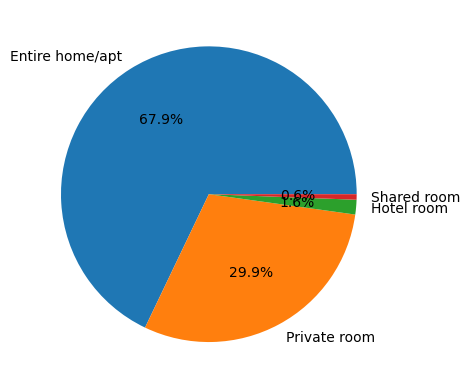

In [65]:
diagrama_sectores(df_alojamientos, ['Centro', 'Arganzuela', 'Retiro', 'Salamanca', 'Chamartín', 'Tetuán', 'Chamberí', 'Fuencarral - El Pardo', 'Moncloa - Aravaca', 'Latina', 'Carabanchel', 'Usera', 'Puente de Vallecas', 'Moratalaz', 'Ciudad Lineal', 'Hortaleza', 'Villaverde', 'Villa de Vallecas', 'Vicálvaro', 'San Blas - Canillejas', 'Barajas'])

### Apartado 11

In [66]:
def diagrama_barras(df_alojamientos, lista_distritos):
    df_distritos = df_alojamientos[df_alojamientos['distrito'].isin(lista_distritos)]
    alojamientos_por_distrito = df_distritos['distrito'].value_counts()
    alojamientos_por_distrito.plot(kind='bar')
    plt.show()

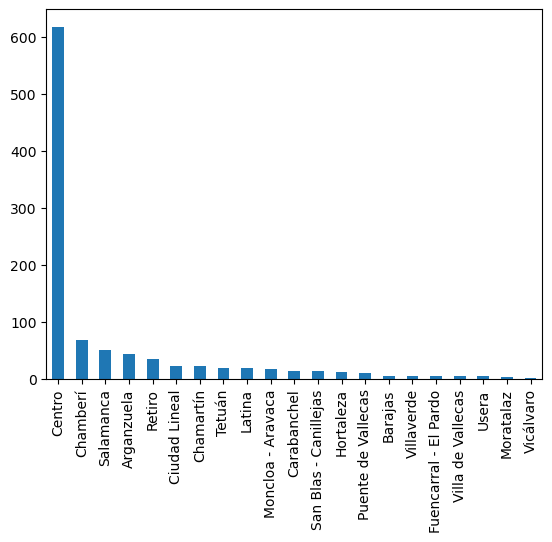

In [67]:
diagrama_barras(df_alojamientos, ['Centro', 'Arganzuela', 'Retiro', 'Salamanca', 'Chamartín', 'Tetuán', 'Chamberí', 'Fuencarral - El Pardo', 'Moncloa - Aravaca', 'Latina', 'Carabanchel', 'Usera', 'Puente de Vallecas', 'Moratalaz', 'Ciudad Lineal', 'Hortaleza', 'Villaverde', 'Villa de Vallecas', 'Vicálvaro', 'San Blas - Canillejas', 'Barajas'])